<a href="https://colab.research.google.com/github/Borys35/1D-2D-Interpolation/blob/main/soic_1d_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Functions
def f1(x):
  return np.sin(x)
def f2(x):
  return np.sin(x**-1)
def f3(x):
  return np.sign(np.sin(x*8))

# Kernels
def h1(x):
  return np.where((x >= 0) & (x < 1), 1, 0)
def h2(x):
  return np.where((x >= -1/2) & (x < 1/2), 1, 0)
def h3(x):
  return np.where((x >= -1) & (x <= 1), 1 - np.abs(x), 0)

In [ ]:
def interpolate_with_convolution(x, f, h, scale=1):
    y = f(x)
    N = len(x)
    x_interp = np.linspace(x.min(), x.max(), N * scale)
    y_interp = interp1d(x, y, kind='zero')(x_interp)

    x_kernel = np.linspace(-1, 1, len(y_interp))
    y_kernel = h(x_kernel).astype(np.float64)

    y_kernel /= np.sum(y_kernel)

    y_smoothed = np.convolve(y_interp, y_kernel, mode='same')

    mse = mean_squared_error(y_smoothed, f(x_interp))
    print(f'MSE: {mse}')

    return x_interp, y_smoothed

In [ ]:
def interpolate(x, f, scale=1):

    y = f(x)
    N = len(x)
    x_interp = np.linspace(x.min(), x.max(), N * scale)
    y_interp = interp1d(x, y, kind='zero')(x_interp)

    mse = mean_squared_error(y_interp, f(x_interp))
    print(f'MSE: {mse}')

    return x_interp, y_interp

In [ ]:
def plot(f):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

  N = 40
  x = np.linspace(-np.pi, np.pi, N)

  x_interp, y_interp = interpolate(x, f, 2)
  ax1.plot(x, f(x), '.', label='Funkcja')
  ax1.plot(x_interp, y_interp, label='Interpolacja')
  ax1.legend()
  ax1.set_title(f"Funkcja {f.__name__}, {N*2} punktów")

  x_interp, y_interp = interpolate(x, f, 4)
  ax2.plot(x, f(x), '.', label='Funkcja')
  ax2.plot(x_interp, y_interp, label='Interpolacja')
  ax2.legend()
  ax2.set_title(f"Funkcja {f.__name__}, {N*4} punktów")


  x_interp, y_interp = interpolate(x, f, 10)
  ax3.plot(x, f(x), '.', label='Funkcja')
  ax3.plot(x_interp, y_interp, label='Interpolacja')
  ax3.legend()
  ax3.set_title(f"Funkcja {f.__name__}, {N*10} punktów")

  plt.show()

In [ ]:
def plot_with_convolution(f, h = h1):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

  N = 40
  x = np.linspace(-np.pi, np.pi, N)

  x_interp, y_interp = interpolate_with_convolution(x, f, h, 2)
  ax1.plot(x, f(x), '.', label='Funkcja')
  ax1.plot(x_interp, y_interp, label='Interpolacja')
  ax1.legend()
  ax1.set_title(f"Funkcja {f.__name__}, kernel {h.__name__}, {N*2} punktów")

  x_interp, y_interp = interpolate_with_convolution(x, f, h, 4)
  ax2.plot(x, f(x), '.', label='Funkcja')
  ax2.plot(x_interp, y_interp, label='Interpolacja')
  ax2.legend()
  ax2.set_title(f"Funkcja {f.__name__}, kernel {h.__name__}, {N*4} punktów")

  x_interp, y_interp = interpolate_with_convolution(x, f, h, 10)
  ax3.plot(x, f(x), '.', label='Funkcja')
  ax3.plot(x_interp, y_interp, label='Interpolacja')
  ax3.legend()
  ax3.set_title(f"Funkcja {f.__name__}, kernel {h.__name__}, {N*10} punktów")

  plt.show()

MSE: 0.004225697623894216
MSE: 0.004172673350893256
MSE: 0.004261076364139978


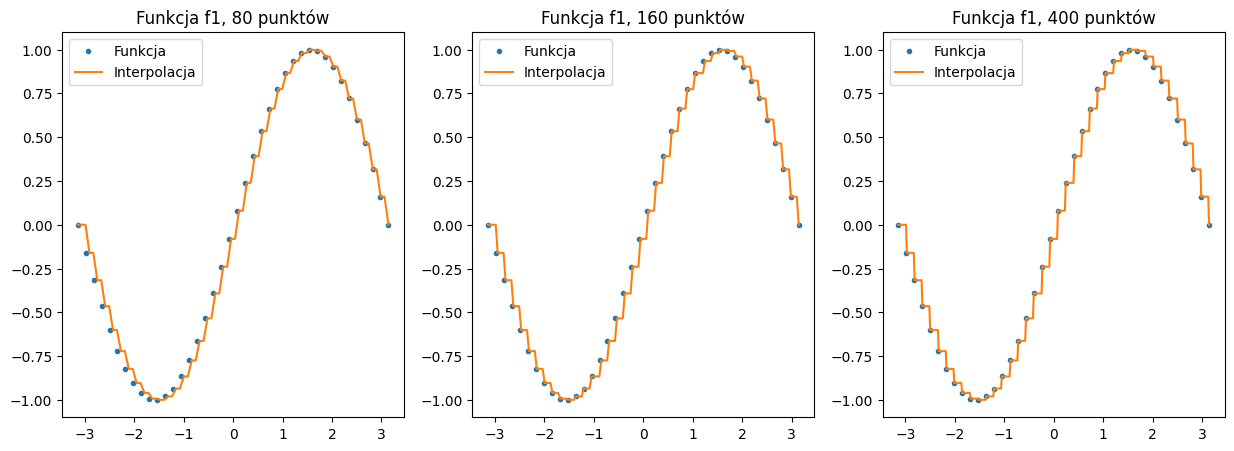

MSE: 0.09479016046881164
MSE: 0.08198530255807006
MSE: 0.09510701661192542


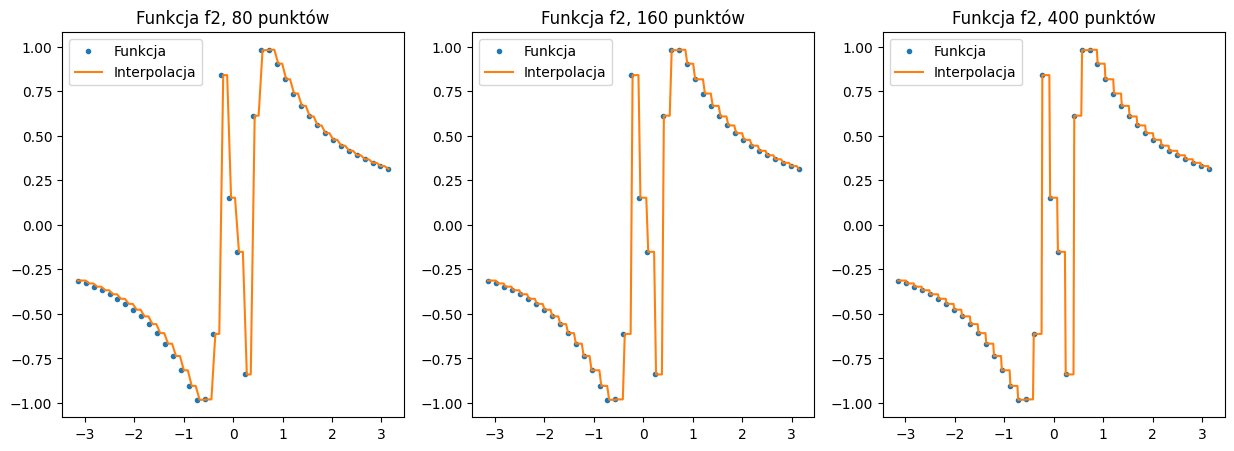

MSE: 0.75
MSE: 0.75
MSE: 0.77


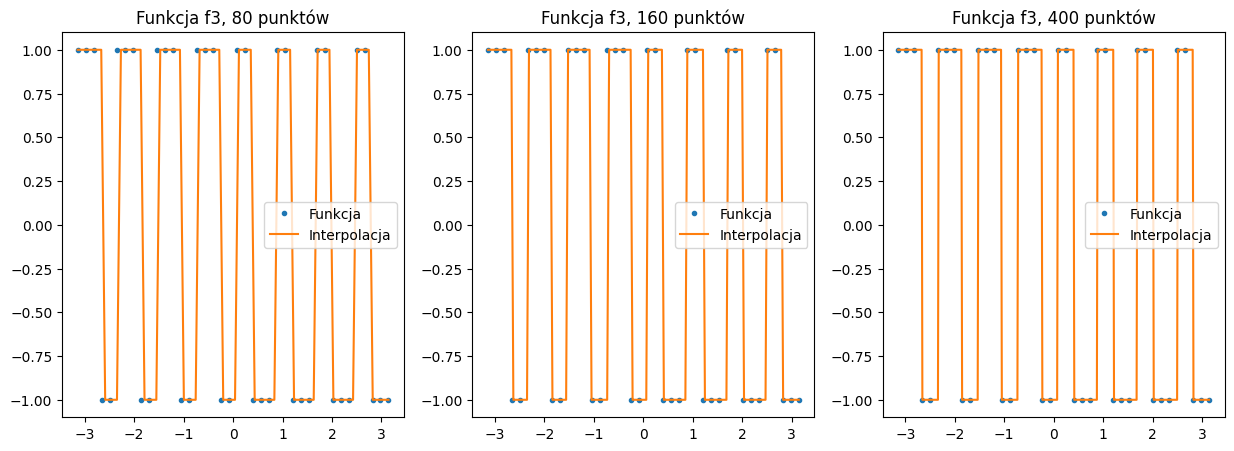

In [ ]:
for f in [f1, f2, f3]:
   plot(f)

MSE: 0.5174864629015289
MSE: 0.5124706433395925
MSE: 0.5093066989148094


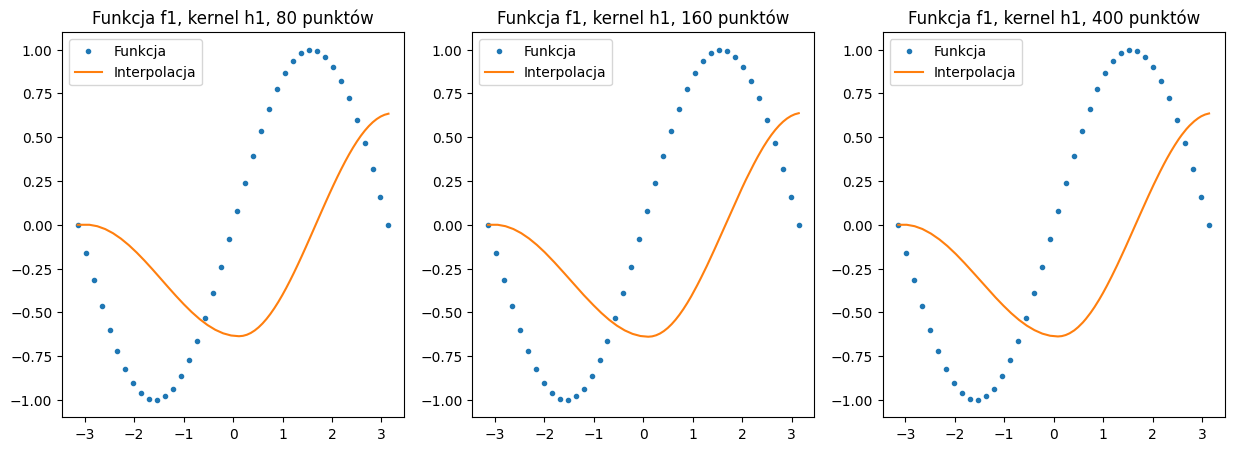

MSE: 0.06938919953958067
MSE: 0.0655369258879451
MSE: 0.06415449553541216


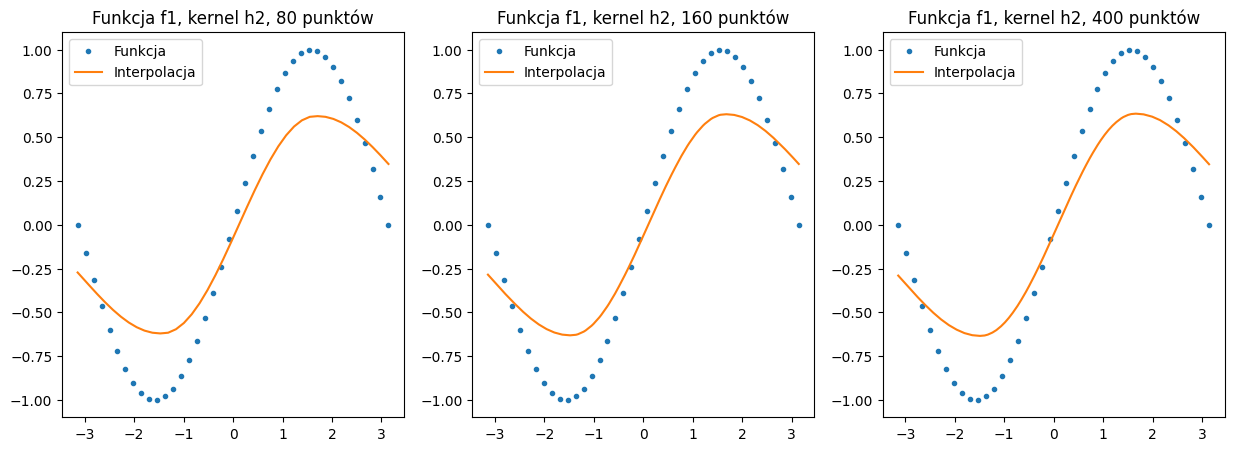

MSE: 0.1394222161420223
MSE: 0.13687153240089103
MSE: 0.13626552417459264


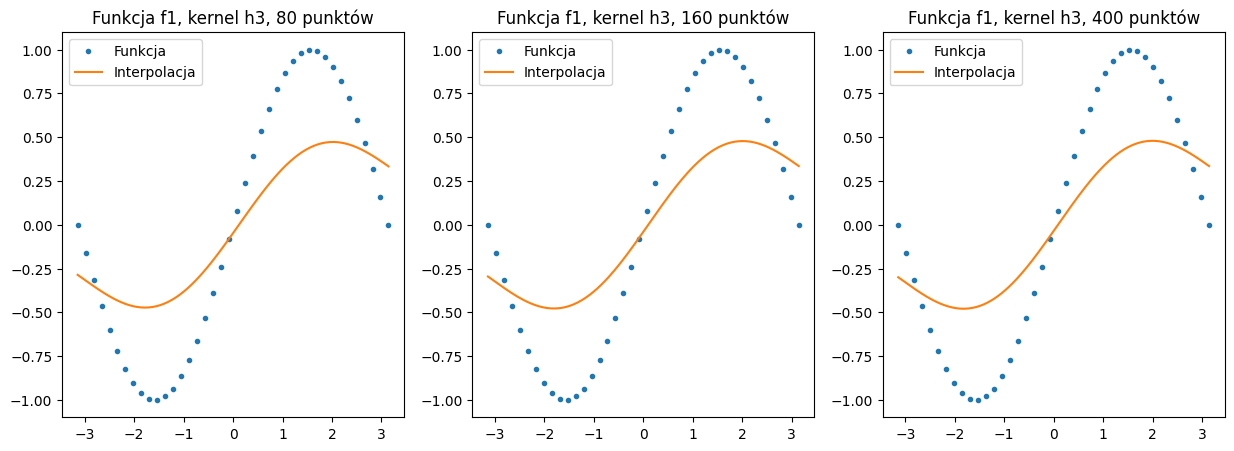

MSE: 0.40732381219801156
MSE: 0.4098978517642135
MSE: 0.41564594298352797


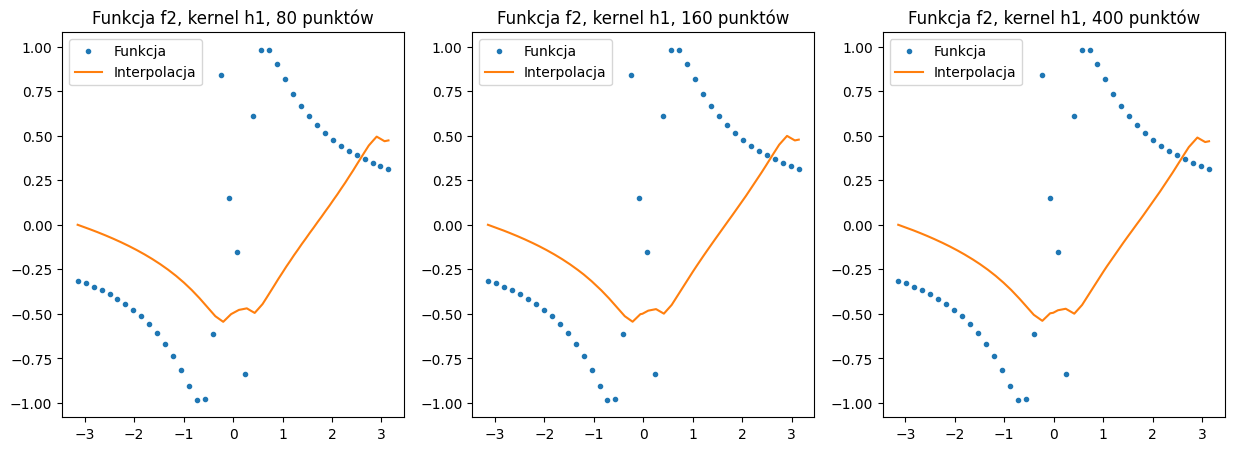

MSE: 0.14836030923980487
MSE: 0.1507437194290695
MSE: 0.15461600675314432


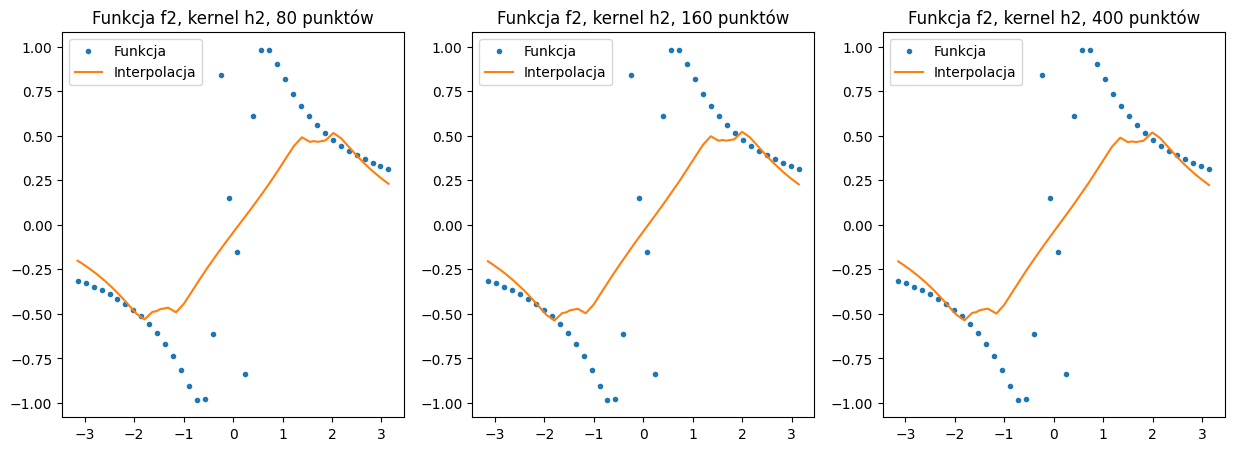

MSE: 0.1853780904194724
MSE: 0.18902879635656672
MSE: 0.19416209255602354


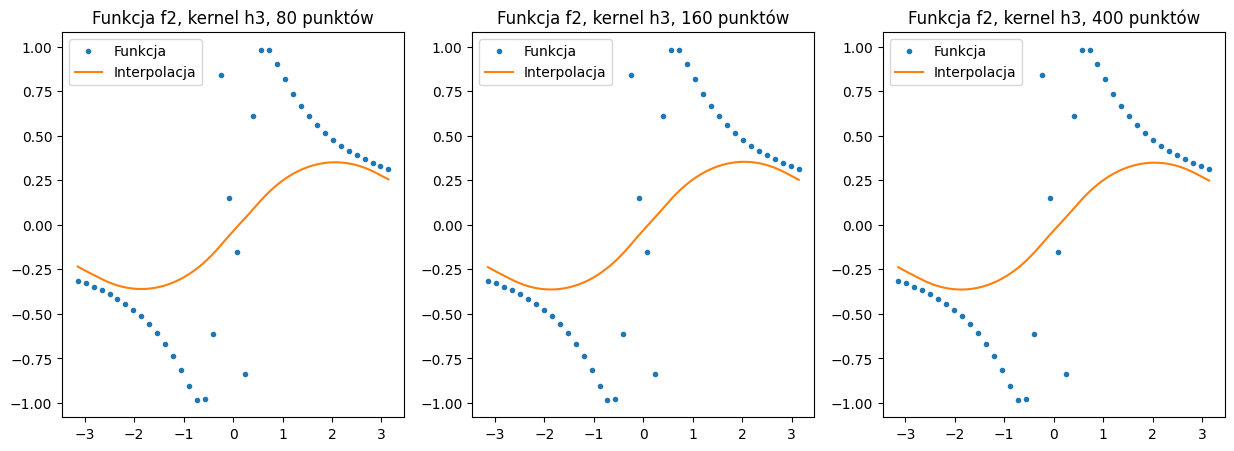

MSE: 1.045792241946088
MSE: 1.0384834161192118
MSE: 1.031860306557915


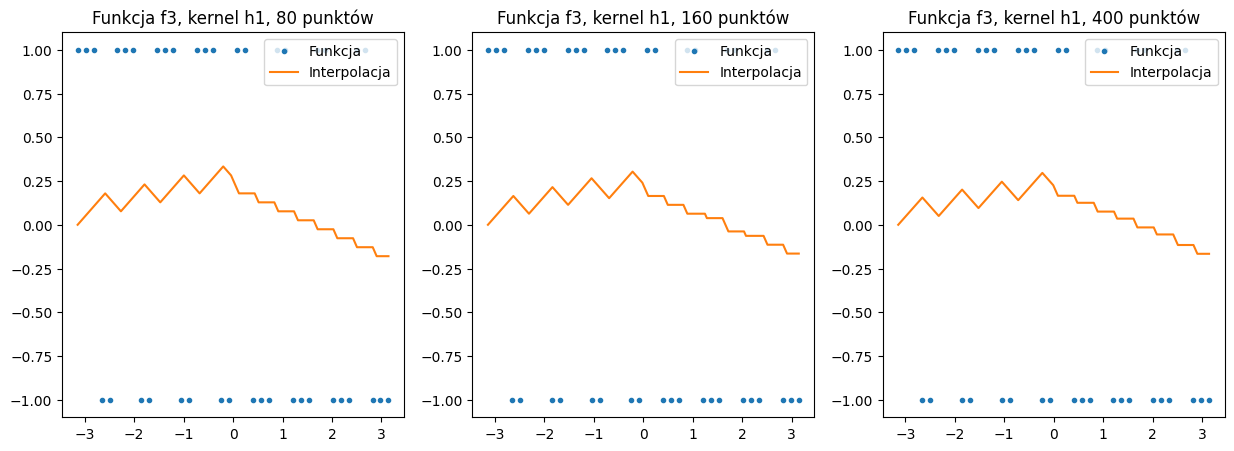

MSE: 1.01225
MSE: 1.0125312499999999
MSE: 1.014629


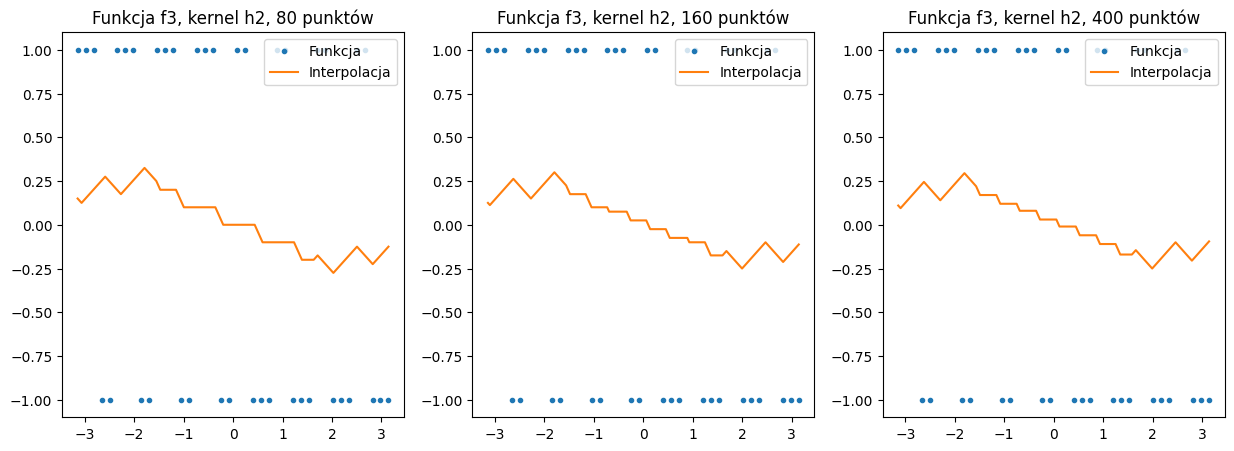

MSE: 0.9993112056213018
MSE: 0.9967653859057041
MSE: 0.9964485997765209


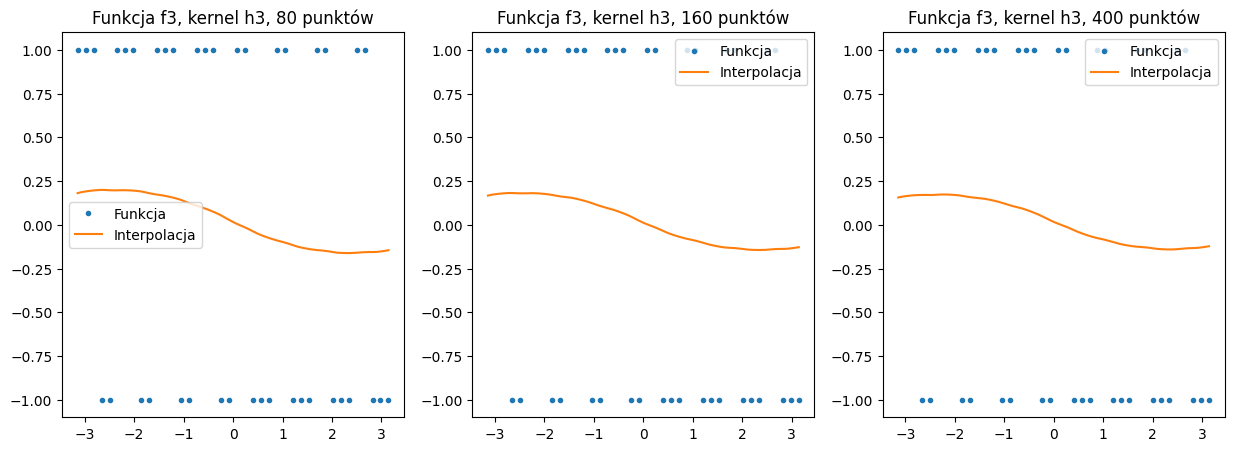

In [ ]:
for f in [f1, f2, f3]:
    for h in [h1, h2, h3]:
      plot_with_convolution(f, h)